####Librerias

In [3]:
!pip install -q -U opencv-python

import os
import cv2

from matplotlib import pyplot as plt


from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
from google.colab.patches import cv2_imshow 
from PIL import Image, ImageDraw
import numpy as np
import glob

####Utils

In [26]:
TEMPLATE_PATH = '/content/drive/MyDrive/Colab Notebooks/rafita_labels_project/plantilla.jpg'
DB_PATH = '/content/drive/MyDrive/Colab Notebooks/rafita_labels_project/db-3/'
RESULT_PATH = '/content/drive/MyDrive/Colab Notebooks/rafita_labels_project/results/'

In [6]:
def get_img(path, format):
  j=path+format 
  img = cv2.imread(os.path.join(j))

  return img


In [43]:
def put_name(img, text):

    #write text            text          coordinates     FONT  font size   color thiknes
  img = cv2.putText(img ,text,(40,175), cv2.FONT_ITALIC, 0.45, 2, 1)

  return img

In [8]:
def put_qr(template,qr, y_offset, x_offset):

  qr = qr.copy()

  s_img = cv2.resize(qr,(80,80))
  l_img = template.copy()

  y1, y2 = y_offset, y_offset + s_img.shape[0]
  x1, x2 = x_offset, x_offset + s_img.shape[1]

  l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img
        
  return l_img

In [9]:
def put_flota(template,flota, y_offset, x_offset):
  flota = flota.copy()

  s_img = cv2.resize(flota,(100,60))
  l_img = template.copy()

  y1, y2 = y_offset, y_offset + s_img.shape[0]
  x1, x2 = x_offset, x_offset + s_img.shape[1]

  l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img
        
  return l_img

In [10]:
def put_face(template,face, y_offset, x_offset):

  face = face.copy()

  s_img = cv2.resize(face,(80,80))
  l_img = template.copy()

  y1, y2 = y_offset, y_offset + s_img.shape[0]
  x1, x2 = x_offset, x_offset + s_img.shape[1]

  alpha_s = s_img[:, :, 3] / 255.0
  alpha_l = 1.0 - alpha_s

  for c in range(0, 3):
      l_img[y1:y2, x1:x2, c] = (alpha_s * s_img[:, :, c] +
                                alpha_l * l_img[y1:y2, x1:x2, c])

          
  return l_img

In [11]:
def get_face_img(path):
  # Open the input image as numpy array, convert to RGB
  img=Image.open(path).convert("RGB")
  npImage=get_img(path,"")  #np.array(img)
  h,w=img.size

  # Create same size alpha layer with circle
  alpha = Image.new('L', img.size,0)
  draw = ImageDraw.Draw(alpha)
  draw.pieslice([0,0,h,w],0,360,fill=255)

  # Convert alpha Image to numpy array
  npAlpha=np.array(alpha)

  # Add alpha layer to RGB
  npImage=np.dstack((npImage,npAlpha))

  return npImage


In [39]:
def save_image(template, flota, face, qr, name):
  template = get_img(TEMPLATE_PATH, '')
  tt = put_name(template,name)
  pq = put_qr(tt, qr, 185,70)
  pf = put_flota(pq, flota, 268,117)

  faceImage = get_face_img(face)
  rgba = cv2.cvtColor(pf,cv2.COLOR_RGB2RGBA)
  pq = put_face(rgba, faceImage, 63,66)
  cv2_imshow(pq)

  # Convert RGB to BGR 
  #image = Image.fromarray(pq, 'RGBA')
  #image.save(RESULT_PATH+name+'.png')  
  #cv2.imwrite(RESULT_PATH+name, pq)

  

###Ejecutacion 

/content/drive/MyDrive/Colab Notebooks/rafita_labels_project/db-3/DTHIAGOEXPRESS
Edinson Granobles


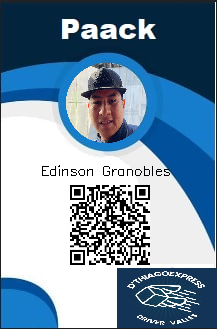

Gaston Martin


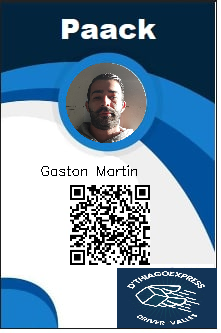

Daniel Carbajal


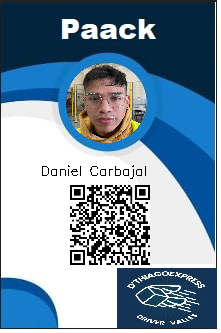

Diego Bautista


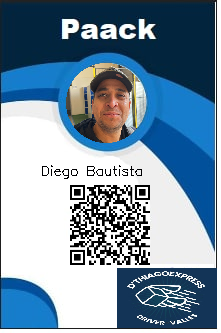

Lina Marcela Rodriguez


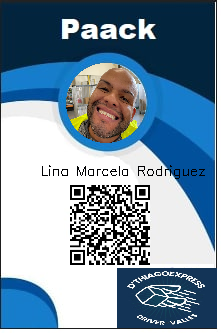

/content/drive/MyDrive/Colab Notebooks/rafita_labels_project/db-3/PATCA
Marco Morazan


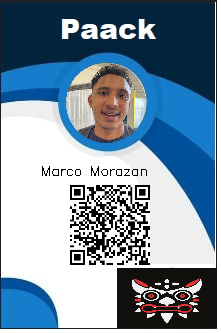

Matheus Rodriguez


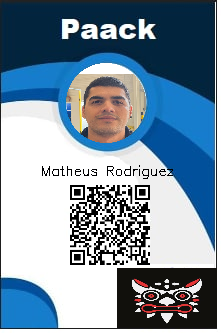

Milton Marin


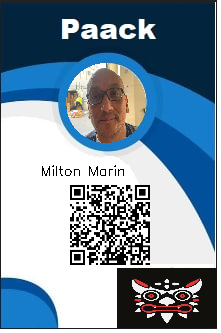

Mohammed Mokhtar


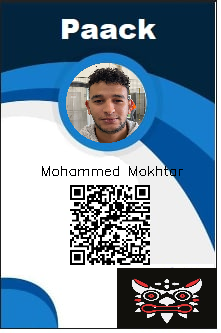

Eleandro Ferreira


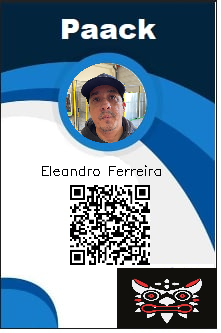

Johendry Enrique


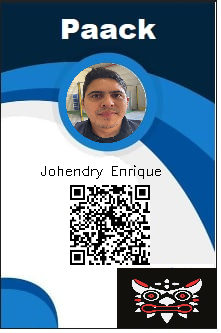

/content/drive/MyDrive/Colab Notebooks/rafita_labels_project/db-3/DISADA
Angel Colina


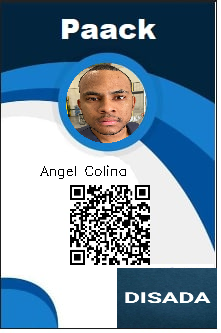

In [44]:
template = get_img(TEMPLATE_PATH, '')

for dir in os.listdir(DB_PATH):
  d_flota = os.path.join(DB_PATH, dir)
  print(d_flota)


  for f in os.listdir(d_flota):
    
    flota_f = os.path.join(d_flota,f)
    flota_img_path = glob.glob(d_flota+'/*.png')
    if len(flota_img_path) == 0:
      flota_img_path = glob.glob(d_flota+'/*.jpg')
    flota_img = get_img(flota_img_path[0],"")

    #if is user dir
    if os.path.isdir(flota_f):
      name = f #name
      print(f)
      person_dir= flota_f
      #iteration inside person dir
      for ff in os.listdir(person_dir):
        person_f = os.path.join(person_dir,ff)

        if os.path.isfile(person_f):
          person_img_path = person_f

        if os.path.isdir(person_f):
          qr_dir = person_f
          for qr in os.listdir(qr_dir):
            qr_path_img = os.path.join(qr_dir,qr)
            qr_img = get_img(qr_path_img,"")
        
      save_image(template, flota_img, person_img_path, qr_img, name )  


###Ejecutasion test

In [ ]:
ztemplate = get_img(TEMPLATE_PATH, '')
qr = get_img('/content/drive/MyDrive/Colab Notebooks/rafita_labels_project/db/flota/person/qr/qr.png','')
flota = get_img('/content/drive/MyDrive/Colab Notebooks/rafita_labels_project/db/flota/logo.jpg','')
face = '/content/drive/MyDrive/Colab Notebooks/rafita_labels_project/db/flota/person/reyexamine.jpg'

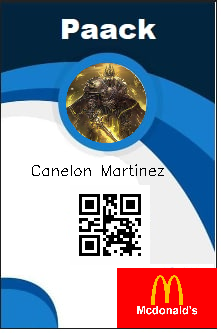

In [ ]:
template = get_img(TEMPLATE_PATH, '')
tt = put_name(template,'Canelon Martinez')
pq = put_qr(tt, qr, 185,70)
pf = put_flota(pq, flota, 268,117)

faceImage = get_face_img(face)
rgba = cv2.cvtColor(pf, cv2.COLOR_RGB2RGBA)
pq = put_face(rgba, faceImage, 63,66)

cv2_imshow(pq)